In [2]:
import tensorflow as tf

print(tf.__version__)

2024-11-04 16:51:19.799238: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-04 16:51:19.852578: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-04 16:51:19.870231: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-04 16:51:19.874782: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-04 16:51:19.921461: I tensorflow/core/platform/cpu_feature_guar

2.17.0


In [3]:
# Load the data
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

type(data)

sklearn.utils._bunch.Bunch

In [4]:
# Check data itself
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
# Checking shape
data.data.shape

(569, 30)

In [6]:
# Check targets
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
# Check target names
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
# Check feature names
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
# Make train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data,
                                                    data.target,
                                                    test_size=0.2,
                                                    random_state=42)


In [10]:
# Get shape from X_train (matrix sizes)

N, D = X_train.shape

N, D

(455, 30)

In [11]:
# Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

I0000 00:00:1730749883.804365   50898 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730749883.948102   50898 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730749883.948682   50898 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730749883.951768   50898 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [13]:
# Alternative
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Input(shape=(D,)))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(
    optimizer='adam',
    loss= 'binary_crossentropy',
    metrics=['accuracy']
)


In [15]:
results = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100
)


Epoch 1/100


I0000 00:00:1730749884.735579   52398 service.cc:146] XLA service 0x70d178006c90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730749884.735607   52398 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-11-04 16:51:24.782211: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-04 16:51:24.888189: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4828 - loss: 0.7594  

I0000 00:00:1730749885.208132   52398 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4832 - loss: 0.7591 - val_accuracy: 0.5789 - val_loss: 0.6582
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5898 - loss: 0.6745 - val_accuracy: 0.7368 - val_loss: 0.5727
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6762 - loss: 0.5982 - val_accuracy: 0.7895 - val_loss: 0.5050
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7598 - loss: 0.5351 - val_accuracy: 0.8509 - val_loss: 0.4496
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8366 - loss: 0.4818 - val_accuracy: 0.8772 - val_loss: 0.4073
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8476 - loss: 0.4442 - val_accuracy: 0.8947 - val_loss: 0.3734
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8792 - loss: 0.4000 - val_accuracy: 0.9035 - val_loss: 0.3448
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9075 - loss: 0.3613 - val_accuracy: 0.9123 - val_loss: 0

In [16]:
# Evaluate model
print("Train score: ", model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9889 - loss: 0.0777
Train score:  [0.09127981215715408, 0.9846153855323792]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9728 - loss: 0.0822 
Test score:  [0.07946740835905075, 0.9736841917037964]


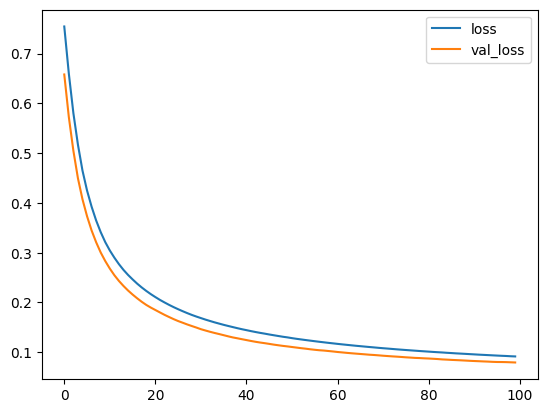

In [17]:
# Plot loss per epoch
import matplotlib.pyplot as plt

plt.plot(results.history['loss'], label='loss')
plt.plot(results.history['val_loss'], label='val_loss')
plt.legend()

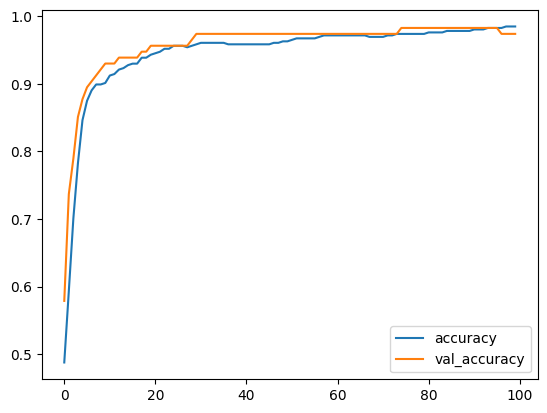

In [18]:
# Plot accuracy per epoch
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [19]:
# Making predictions
predictions = model.predict(X_test)
print(predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[8.4935582e-01]
 [5.1792298e-04]
 [5.5593032e-02]
 [9.8092139e-01]
 [9.9755645e-01]
 [1.4048783e-07]
 [1.2181519e-06]
 [8.0164395e-02]
 [6.2976205e-01]
 [9.9153697e-01]
 [9.2339391e-01]
 [7.5800240e-02]
 [9.6465611e-01]
 [3.2601598e-01]
 [9.9271011e-01]
 [3.0329681e-03]
 [9.8734874e-01]
 [9.9938166e-01]
 [9.9990869e-01]
 [1.2686834e-04]
 [7.5122929e-01]
 [9.6400803e-01]
 [4.3255277e-06]
 [9.9873716e-01]
 [9.9078655e-01]
 [9.9672437e-01]
 [9.8835027e-01]
 [9.7929031e-01]
 [9.7036463e-01]
 [2.6927114e-04]
 [9.9146068e-01]
 [9.9817848e-01]
 [9.8955965e-01]
 [9.6525836e-01]
 [9.9703419e-01]
 [9.9207014e-01]
 [1.9874628e-01]
 [9.8989713e-01]
 [3.8613104e-03]
 [8.0373746e-01]
 [9.9737948e-01]
 [1.6298419e-02]
 [9.7654575e-01]
 [9.8982984e-01]
 [9.7920656e-01]
 [9.2731446e-01]
 [9.9227166e-01]
 [9.9721575e-01]
 [9.1705757e-01]
 [9.8864472e-01]
 [7.0307548e-03]
 [3.3516917e-05]
 [4.8238978e-01]
 [9.2236596e-01]
 [9.9683857e-01]
 [9.6915811e-01]
 [9.975944

In [20]:
# Rounding and flatting predictions
import numpy as np
predictions = np.round(predictions).flatten()
print(predictions)

[1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0.]


In [21]:
# Calculating the accuracy and comparing with the model evaluation
print("Accuracy: ", np.mean(predictions == y_test))
print("Evaluate: ", model.evaluate(X_test, y_test))

Accuracy:  0.9736842105263158
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9728 - loss: 0.0822 
Evaluate:  [0.07946740835905075, 0.9736841917037964]


In [25]:
# Saving model
model.save('linear_classification.keras')

# .hdf5 is deprecated

In [27]:
# Loading model
model = tf.keras.models.load_model('linear_classification.keras')
print(model.layers)
model.evaluate(X_test, y_test)

/home/gaby/anaconda3/envs/tensorflow-studies/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


[<Dense name=dense, built=True>]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9728 - loss: 0.0822 


[0.07946740835905075, 0.9736841917037964]